<a href="https://colab.research.google.com/github/crodriguezbay/MLforMkting/blob/main/l07_sentiment_analisis_clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div >
<img src = "figs/bannerMLMkting.png" />
</div>

# Análisis de sentimientos

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaciomsarmiento/RecomSystemsLectures/blob/main/L07_sentimientos/L07_sentiment_analisis_clase.ipynb)

El análisis de sentimientos es un campo interdisciplinario que involucra matemáticas, estadística, informática y lingüística, entre otros. A continuación, te explico brevemente la matemática detrás del análisis de sentimientos:

En primer lugar, el análisis de sentimientos utiliza modelos matemáticos para representar el tono emocional de un texto. Por ejemplo, un modelo comúnmente utilizado es el modelo de bolsa de palabras (bag-of-words), que representa el texto como una colección de palabras, ignorando el orden en que aparecen. Este modelo se utiliza para calcular la frecuencia de cada palabra en el texto y, a partir de ahí, determinar su polaridad emocional.

Para determinar la polaridad emocional de una palabra, se utilizan diccionarios de palabras que han sido previamente clasificadas como positivas, negativas o neutrales. Estos diccionarios se construyen mediante el análisis de grandes conjuntos de datos, donde se etiquetan las palabras según su tono emocional. Palabras como:

* Bueno.
* Excelente.
* Malo.
* pésimo.

Dan polaridad a nuestro estudio,

Una vez que se ha calculado la polaridad emocional de cada palabra en el texto, se utiliza un algoritmo de clasificación para asignar una polaridad emocional al texto en su conjunto. Los algoritmos más comunes son el análisis de sentimiento basado en reglas y el análisis de sentimiento basado en aprendizaje automático.

En términos de aplicaciones reales, el análisis de sentimientos se utiliza en una amplia variedad de campos y situaciones. Algunas aplicaciones comunes son:

* Medición de la satisfacción del cliente: las empresas pueden utilizar el análisis de sentimientos para medir la satisfacción del cliente en las redes sociales o en los comentarios de los clientes en línea.

* Análisis de la opinión pública: los gobiernos y los grupos de interés pueden utilizar el análisis de sentimientos para medir la opinión pública sobre temas políticos o sociales.

* Análisis de la percepción de la marca: las empresas pueden utilizar el análisis de sentimientos para medir la percepción de la marca entre los consumidores.
* Análisis de la efectividad publicitaria: las empresas pueden utilizar el análisis de sentimientos para medir la efectividad de sus campañas publicitarias.

En resumen, el análisis de sentimientos es una técnica poderosa que se utiliza para medir el tono emocional de un texto y comprender mejor las opiniones y actitudes de las personas. Utiliza modelos matemáticos y algoritmos de clasificación para lograr esto, y tiene aplicaciones en una amplia variedad de campos y situaciones.

In [ ]:
# required libraries
import pandas as pd
#import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/RecomSystemsLectures/main/L07_sentimientos/data/Amazon.csv', index_col="Unnamed: 0")

In [ ]:
data.head()

,id,reviews.text,reviews.rating,reviews.text_esp
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2000 non-null   object 
 1   reviews.text      2000 non-null   object 
 2   reviews.rating    2000 non-null   float64
 3   reviews.text_esp  2000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 78.1+ KB


In [ ]:
data["reviews.rating"]=data["reviews.rating"].astype(int)

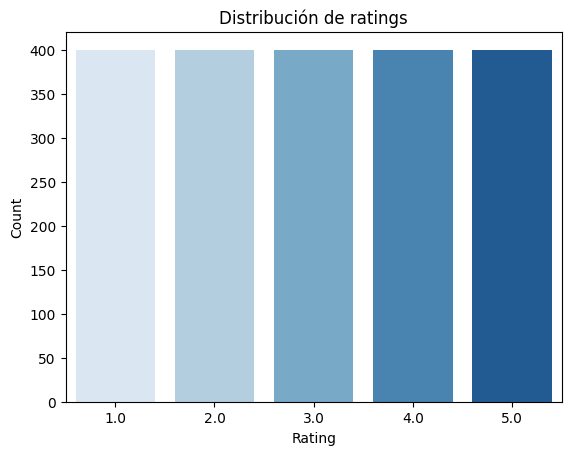

In [ ]:
# distribution de los raitings
sns.countplot(x='reviews.rating', data=data, palette='Blues')

plt.title('Distribución de ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# map ratings 1, 2, 3 a 0 (NEGATIVE) y 4, 5 a 1 (POSITIVE)

sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}

# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

## Map es una funcion util y puede usarse como alternativa a los fors.
# list(map(funcion, lista))
#numbers = [10, 15, 21, 33, 42, 55]
#mapped_numbers = list(map(lambda x: x * 2 + 3, numbers))

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5,Esta es una tableta muy agradable para mi novi...,1,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5,Me encanta esta tableta. Fácil de usar. Y el p...,1,POSITIVE
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5,Precio asequible calidad increíble Me encanta ...,1,POSITIVE
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5,Compré esto después de hablar con un represent...,1,POSITIVE
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5,Compré esta tableta para mi hijo de 2 años y m...,1,POSITIVE


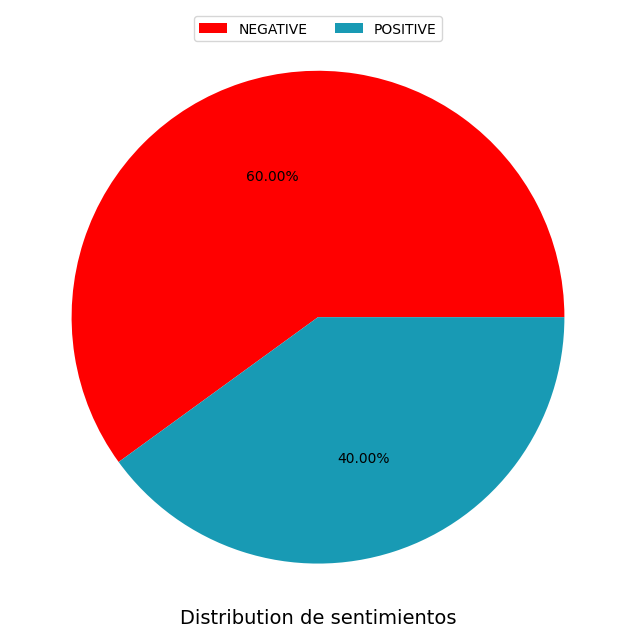

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['NEGATIVE','POSITIVE']
colors = ['#FF0000', '#189AB4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution de sentimientos', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter


In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 13.1 MB/s eta 0:00:00


In [ ]:
# Eliminamos stopwords
from nltk.corpus import stopwords
import unidecode
nltk.download('stopwords')
stopwords = set(stopwords.words("spanish"))

# Creamos un diccionario de stopwords en español
stopwords = [unidecode.unidecode(i) for i in stopwords]
stopwords = set(stopwords)
stop_words=list(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## Limpieza de texto.
def clean_text(text:str)-> str:
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)

    text = text.lower()
    text = text.strip()

    text = re.sub(' \d+', ' ', text)

    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    text = text.strip()

    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    return ' '.join(a)

In [ ]:
data

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5,Esta es una tableta muy agradable para mi novi...,1,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5,Me encanta esta tableta. Fácil de usar. Y el p...,1,POSITIVE
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5,Precio asequible calidad increíble Me encanta ...,1,POSITIVE
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5,Compré esto después de hablar con un represent...,1,POSITIVE
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5,Compré esta tableta para mi hijo de 2 años y m...,1,POSITIVE
...,...,...,...,...,...,...
1995,AVpfl8cLLJeJML43AE3S,I'm returning it because a new version is comi...,1,Lo devuelvo porque viene una nueva versión,0,NEGATIVE
1996,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,1,Me sorprendió descubrir que no venía con ningú...,0,NEGATIVE
1997,AVpidLjVilAPnD_xEVpI,Expected it to be a bigger version of the HDX ...,1,Esperaba que fuera una versión más grande del ...,0,NEGATIVE
1998,AV1YE_muvKc47QAVgpwE,Never bought this item at all. So i guess you ...,1,Nunca compré este artículo en absoluto. Así qu...,0,NEGATIVE


In [ ]:
# remove stopwords
data['text'] = data['reviews.text_esp'].apply(clean_text)
data['text']=data['text'].apply(stopword)

In [ ]:
data['text']=data['text'].str.replace("á","a").str.replace("é","e").str.replace("í","i").str.replace("ó","o").str.replace("ú","u")

In [ ]:
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')

def stemmer(texto):
    return(spanish_stemmer.stem(texto))
data['text']=data['text'].apply(stemmer)

In [ ]:
data['text'].apply(stemmer)

,text
0,tableta agradable novia nunca habi
1,encanta tableta facil usar precio correct
2,precio asequible calidad increible encanta tab...
3,compre despues hablar representante ventas tig...
4,compre tableta hijo años medio perfecta juegos...
...,...
1995,devuelvo viene nueva version
1996,sorprendio descubrir venia ningun tipo cable c...
1997,esperaba version mas grande hdx correo electro...
1998,nunca compre articulo absoluto asi supongo deb...


In [ ]:
# Graficos de palbras.

# todas las palabras
all_words = pd.Series(' '.join(data['text']).split())

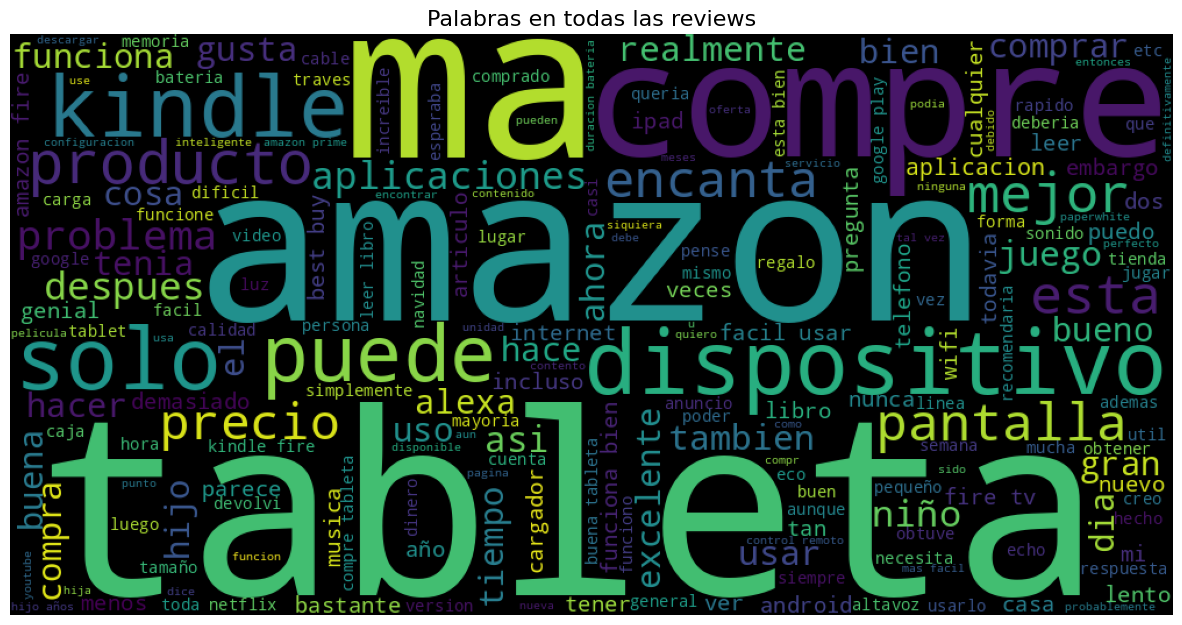

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras en todas las reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
# get words used positive reivews
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['text']).split())

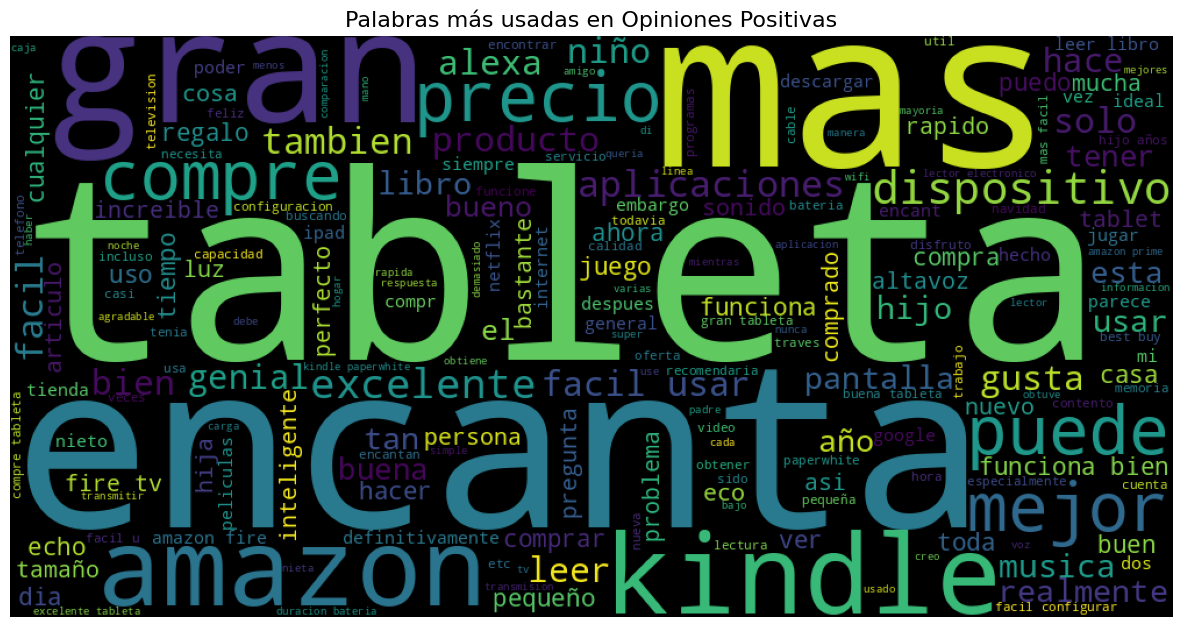

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Positivas", size=16)

plt.axis("off")
plt.show()

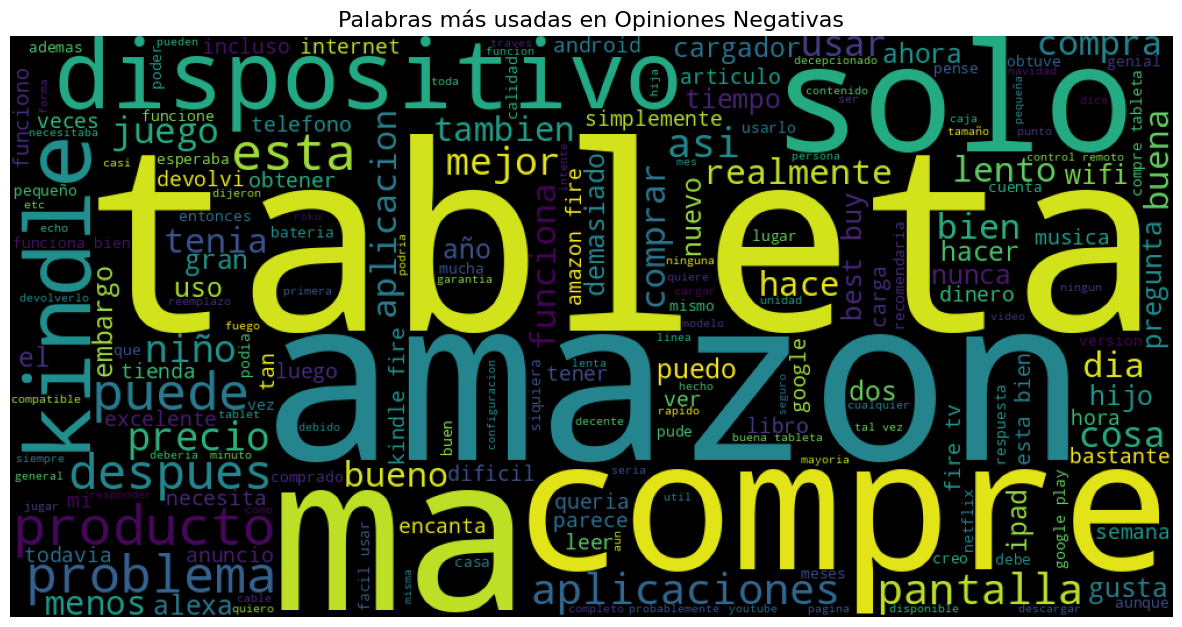

In [ ]:
# get words used positive reivews
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Negativas", size=16)

plt.axis("off")
plt.show()

In [ ]:
pip install sentiment_analysis_spanish

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 60.7 MB/s eta 0:00:00


In [ ]:
from sentiment_analysis_spanish import sentiment_analysis
def analysis_sentimientos(x):
    sa=sentiment_analysis.SentimentAnalysisSpanish()
    return(sa.sentiment(x))

In [ ]:
## Seleccionar una muestra
data5 = data[data['reviews.rating']==5].sample(20,random_state=43)
data4 = data[data['reviews.rating']==4].sample(20,random_state=43)
data3 = data[data['reviews.rating']==3].sample(20,random_state=43)
data2 = data[data['reviews.rating']==2].sample(20,random_state=43)
data1 = data[data['reviews.rating']==1].sample(20,random_state=43)

data2 = pd.concat([data5,data4,data3,data2,data1])

In [ ]:
data2.reset_index(drop=True, inplace=True)

In [ ]:
#data["score"]=data["text"].apply(analysis_sentimientos)
data2["score"]=data2["text"].apply(analysis_sentimientos)

#demora aprox 13 mins

In [ ]:
from joblib import Parallel, delayed
data2["score_SA"] = Parallel(n_jobs=4)(delayed(analysis_sentimientos)(text) for text in data2["text"])

#Corrió en 10 mins

In [ ]:
data2.iloc[23]["reviews.text_esp"]

'Compré esto para mi novia ya que ella está en su teléfono jugando, etc. Lo he usado varias veces y me gusta.'

In [ ]:
data2["score"]

,score
0,0.983732
1,0.620469
2,0.505868
3,0.059778
4,0.115839
...,...
95,0.010412
96,0.283451
97,0.047558
98,0.008035


In [ ]:
data2

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment,text,score
0,AVpfpK8KLJeJML43BCuD,This speaker has a great sound and its perfect...,5,Este altavoz tiene un gran sonido y es perfect...,1,POSITIVE,altavoz gran sonido perfecto salir patio cualq...,0.983732
1,AVpfl8cLLJeJML43AE3S,While I purchased this item as a gift for my s...,5,Si bien compré este artículo como regalo para ...,1,POSITIVE,bien compre articulo regalo hijo resulto ser m...,0.620469
2,AVpfl8cLLJeJML43AE3S,I love my Echo that I received for Christmas f...,5,Me encanta mi Echo que recibí en Navidad de mi...,1,POSITIVE,encanta echo recibi navidad esposa compre yern...,0.505868
3,AV1YnRtnglJLPUi8IJmV,Does all they claim. Am really enjoying my new...,5,Hace todo lo que dicen. Realmente estoy disfru...,1,POSITIVE,hace dicen realmente disfrutando nuevo kindl,0.059778
4,AVpjEN4jLJeJML43rpUe,Good way to get started for kids to play with ...,5,Buena manera de empezar para que los niños jue...,1,POSITIVE,buena manera empezar niños jueguen puedan aprend,0.115839
...,...,...,...,...,...,...,...,...
95,AV1YE_muvKc47QAVgpwE,Bought two of these 2015 models to add to my p...,1,Compré dos de estos modelos 2015 para agregar ...,0,NEGATIVE,compre dos modelos agregar modelo anterior jue...,0.010412
96,AVphgVaX1cnluZ0-DR74,Bought for my grandson he doesn't like it it's...,1,"Comprado para mi nieto, no le gusta, es demasi...",0,NEGATIVE,comprado nieto gusta demasiado lent,0.283451
97,AVpfIfGA1cnluZ0-emyp,1 star...because it worked 1 time and stopped ...,1,1 estrella... porque funcionó 1 vez y dejó de ...,0,NEGATIVE,1 estrella funciono vez dejo funcionar ¡lo dev...,0.047558
98,AVphgVaX1cnluZ0-DR74,"My grand kid didn't like device, get frustrate...",1,"A mi nieto no le gustaba el dispositivo, se fr...",0,NEGATIVE,nieto gustaba dispositivo frustraba navegar vi...,0.008035


In [ ]:
resultados=data2[["sentiment","score_SA","reviews.text_esp","sentiment_score","reviews.rating"]]

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
resultados[resultados["reviews.rating"]==5]

,sentiment,score,reviews.text_esp,sentiment_score,reviews.rating
0,POSITIVE,0.983732,"Este altavoz tiene un gran sonido y es perfecto para salir al patio o en cualquier habitación en la que me encuentre. El toque es molesto en comparación con el Echo con activación por voz, pero las funciones inalámbricas hacen que la compra valga la pena.",1,5
1,POSITIVE,0.620469,"Si bien compré este artículo como regalo para mi hijo, resultó ser una de las mejores elecciones que pude haber hecho. Ama a Alexa y la capacidad de preguntarle lo que parece estar en su mente. Echo es un complemento maravilloso para la disponibilidad de información y la tecnología de la información para mejorar nuestras vidas. Un gran regalo y un artículo muy útil.",1,5
2,POSITIVE,0.505868,Me encanta mi Echo que recibí en Navidad de mi esposa que se lo compré a mi yerno por su cumpleaños. Tiene Amazon prime para que pueda hacer mucho más con el Echo. Me suscribiré también.,1,5
3,POSITIVE,0.059778,Hace todo lo que dicen. Realmente estoy disfrutando de mi nuevo Kindle.,1,5
4,POSITIVE,0.115839,Buena manera de empezar para que los niños jueguen y puedan aprender.,1,5
5,POSITIVE,0.762562,Siento que esta tableta fue perfecta para mis hijos de 8 y 6 años.,1,5
6,POSITIVE,0.617922,Kindle Paprrwjite es el mejor lector electrónico que existe. ¡A por ello!,1,5
7,POSITIVE,0.417093,"Amazon Echo puede hacerlo todo. Lo uso principalmente para reproducir música, configurar temporizadores y hacerle preguntas, pero eventualmente lo usaré para controlar los artículos del hogar.",1,5
8,POSITIVE,0.907343,Súper divertido de conectar con bombillas inteligentes y enchufes inteligentes: te hace sentir como si tuvieras una casa Jetson. Los resúmenes informativos personalizados también son una buena manera de comenzar el día.,1,5
9,POSITIVE,0.997598,"Compré esto en lugar del Fire Stick para emparejarlo con mi nuevo televisor 4K. Fácil de usar, gran selección, diseño pequeño y elegante se combina con mi sistema de entretenimiento.",1,5


## Ejemplo analisis de sentimiento 2 BOW (EN)

"Bag of Words" (BoW) es un método utilizado en el procesamiento de lenguaje natural para representar el texto como una matriz de conteo de palabras. En el análisis de sentimientos, el BoW se utiliza para extraer características del texto que luego se utilizan para clasificarlo como positivo o negativo.

La idea detrás de BoW es tratar cada documento (en este caso, una reseña o comentario) como una "bolsa" de palabras, ignorando el orden en que aparecen en el texto y solo contando su frecuencia. El proceso implica los siguientes pasos:

Tokenización: el texto se divide en palabras individuales, eliminando la puntuación y los caracteres especiales.

Creación de vocabulario: se crea una lista de todas las palabras únicas en todo el corpus de texto.

Vectorización: se crea una matriz donde cada fila representa un documento y cada columna representa una palabra única. El valor en cada celda representa la frecuencia de esa palabra en ese documento.

Normalización: las frecuencias se ajustan para tener en cuenta la longitud del documento y la frecuencia de la palabra en todo el corpus.

Una vez que se ha creado la matriz de BoW, se puede usar para entrenar un modelo de clasificación, como la regresión logística, que puede predecir si una reseña o comentario es positivo o negativo en función de las palabras que contiene. El modelo se entrena utilizando un conjunto de datos de entrenamiento etiquetado que contiene reseñas o comentarios positivos y negativos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

In [ ]:
def limpiar(text):
    text = text.lower()
    text=text.strip()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    return text

In [ ]:
data2["reviews.text"]=data2["reviews.text"].apply(limpiar)
data2["reviews.text"]=data2["reviews.text"].apply(clean_text)

In [ ]:
##pip install nltk

In [ ]:
import nltk

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
stopwords.extend(['five'])

In [ ]:
def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    return ' '.join(a)

In [ ]:
data2["reviews.text.ing"]=data2["reviews.text"].apply(stopword)

In [ ]:
data2.iloc[1][["reviews.text","reviews.text.ing"]]

,1
reviews.text,while i purchased this item as a gift for my son it proved to be one of the best choices i could have made he loves alexa and the ability to ask her whatever seems to be on his mind echo is a wonderful complement to information availability and information technology to better our lives a great gift and a most useful item
reviews.text.ing,purchased item gift son proved one best choices could made loves alexa ability ask whatever seems mind echo wonderful complement information availability information technology better lives great gift useful item


### **Count Vector**

Count Vector es una técnica de vectorización de texto que se utiliza para convertir el texto en una matriz numérica de conteo de palabras. Esta técnica forma parte del proceso de Bag of Words (BoW) que se utiliza en el análisis de texto.

La técnica de Count Vector implica los siguientes pasos:

* Tokenización: el texto se divide en palabras individuales.

* Creación de vocabulario: se crea una lista de todas las palabras únicas en todo el corpus de texto.

* Conteo de palabras: se cuenta la frecuencia de cada palabra en cada documento.

* Vectorización: se crea una matriz donde cada fila representa un documento y cada columna representa una palabra única. El valor en cada celda representa el número de veces que aparece esa palabra en ese documento.

El resultado final es una matriz de números enteros que representa el conteo de palabras en cada documento. Esta matriz se puede utilizar para entrenar un modelo de aprendizaje automático para el análisis de texto, como la regresión logística o el árbol de decisión.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import pandas

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bowmatrix = vectorizer.fit_transform(data2["reviews.text.ing"])

In [ ]:
bowmatrix.toarray().shape

(100, 815)

In [ ]:
print(bowmatrix.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **Stemming**

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()

In [ ]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

data2["reviews.text.ing"] = data2["reviews.text.ing"].apply(stem_sentences)

In [ ]:
data2["reviews.text"]

,reviews.text
0,this speaker has a great sound and its perfect to take out on the patio or in any room that i am in the tap is annoying compared to the echo with voice activation but the wireless features makes the purchase worth it
1,while i purchased this item as a gift for my son it proved to be one of the best choices i could have made he loves alexa and the ability to ask her whatever seems to be on his mind echo is a wonderful complement to information availability and information technology to better our lives a great gift and a most useful item
2,i love my echo that i received for christmas from my wife that i bought it for my son in law for his birthday he has amazon prime so he can do much more with the echo i will be subscribing also
3,does all they claim am really enjoying my new kindle
4,good way to get started for kids to play with and they can learn
...,...
95,bought two of these models to add to my previous model on other sets in the house both of the new units freeze after about minutes stating that my mb connection speed isn t fast enough for watching old documentaries from my prime account cycling the power gets it working until it freezes again the old model works flawlessly i ll be returning these
96,bought for my grandson he doesn t like it it s to slow
97,1 star because it worked time and stopped working returned it the very next day my husband s nexus charger and the belkin w charger that he got to replace this charger do a great job charging my kindle fire hdx
98,my grand kid didn t like device get frustrated to navigate education video not worth it


In [ ]:
data2["reviews.text.ing"]

,reviews.text.ing
0,speaker great sound perfect take patio room tap annoy compar echo voic activ wireless featur make purchas worth
1,purchas item gift son prove one best choic could made love alexa abil ask whatev seem mind echo wonder complement inform avail inform technolog better live great gift use item
2,love echo receiv christma wife bought son law birthday amazon prime much echo subscrib also
3,claim realli enjoy new kindl
4,good way get start kid play learn
...,...
95,bought two model add previou model set hous new unit freez minut state mb connect speed fast enough watch old documentari prime account cycl power get work freez old model work flawlessli return
96,bought grandson like slow
97,1 star work time stop work return next day husband nexu charger belkin w charger got replac charger great job charg kindl fire hdx
98,grand kid like devic get frustrat navig educ video worth


## **Dictionary based sentiment analysis**

In [ ]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
from nltk.corpus import opinion_lexicon

In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
neg_list

{'insociable',
 'diabolically',
 'lugubrious',
 'violation',
 'irresolute',
 'unspeakable',
 'lewdness',
 'disturbingly',
 'loathsome',
 'ill-used',
 'overdo',
 'dispirit',
 'unintelligible',
 'squeal',
 'violent',
 'rant',
 'nauseate',
 'deluded',
 'boggle',
 'deter',
 'fatuous',
 'flaws',
 'backward',
 'idiot',
 'rabid',
 'agonize',
 'threatening',
 'vexation',
 'drunkard',
 'shark',
 'brashly',
 'expire',
 'rigidity',
 'confrontation',
 'simplistic',
 'negatives',
 'berserk',
 'discrimination',
 'junky',
 'unwillingly',
 'flicker',
 'brazen',
 'inconsolable',
 'scars',
 'persecution',
 'aghast',
 'demonize',
 'letch',
 'prosecute',
 'insufficiently',
 'irreconcilable',
 'debt',
 'irked',
 'unfamiliar',
 'disorganized',
 'intrude',
 'checkered',
 'hooligan',
 'unruly',
 'divisive',
 'raging',
 'brutish',
 'grumpily',
 'capriciously',
 'contemptuous',
 'grate',
 'exorbitantance',
 'stumps',
 'passe',
 'abruptly',
 'attacks',
 'disordered',
 'disses',
 'disasterous',
 'mismanage',
 'ob

In [ ]:
pos_list

{'marvel',
 'altruistically',
 'healthful',
 'gained',
 'sweetheart',
 'inpressed',
 'unabashed',
 'undisputable',
 'excitedly',
 'lucidly',
 'remarkably',
 'stately',
 'fluent',
 'prodigious',
 'adulatory',
 'win',
 'jubilantly',
 'bullish',
 'successes',
 'fair',
 'exhilaratingly',
 'survival',
 'clever',
 'civilize',
 'fervent',
 'revives',
 'work',
 'lavishly',
 'faithfulness',
 'impartial',
 'respect',
 'fond',
 'invincible',
 'revolutionary',
 'humourous',
 'courteous',
 'succes',
 'supurb',
 'nimble',
 'effusion',
 'euphorically',
 'entertain',
 'astonishing',
 'lucrative',
 'tantalize',
 'respectfully',
 'astonishingly',
 'promptly',
 'heartfelt',
 'loyal',
 'spectacularly',
 'navigable',
 'meritorious',
 'thrifty',
 'fancy',
 'phenomenally',
 'enlighten',
 'freed',
 'generous',
 'sparkling',
 'thrive',
 'beneficially',
 'risk-free',
 'sumptuous',
 'wows',
 'rock-star',
 'eloquence',
 'improvements',
 'gorgeously',
 'cheerful',
 'gallant',
 'righteousness',
 'impressiveness',
 

In [ ]:
def sentiment_dictionary(x):
    pos=0
    neg=0
    for i in x.split():
        if i in pos_list:
            pos+=1
        if i in neg_list:
            neg+=1
    la={}
    la['positive']=(pos/len(x.split()))*100
    try:
        la['negative']=(neg/len(x.split()))*100
    except:la['negative']=0
    return la

In [ ]:
data2["reviews.text.ing"]

,reviews.text.ing
0,speaker great sound perfect take patio room tap annoy compar echo voic activ wireless featur make purchas worth
1,purchas item gift son prove one best choic could made love alexa abil ask whatev seem mind echo wonder complement inform avail inform technolog better live great gift use item
2,love echo receiv christma wife bought son law birthday amazon prime much echo subscrib also
3,claim realli enjoy new kindl
4,good way get start kid play learn
...,...
95,bought two model add previou model set hous new unit freez minut state mb connect speed fast enough watch old documentari prime account cycl power get work freez old model work flawlessli return
96,bought grandson like slow
97,1 star work time stop work return next day husband nexu charger belkin w charger got replac charger great job charg kindl fire hdx
98,grand kid like devic get frustrat navig educ video worth


In [ ]:
sentiment_dictionary(data2["reviews.text.ing"][17])

{'positive': 12.121212121212121, 'negative': 0.0}

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores(data2["reviews.text.ing"][17])

{'neg': 0.03, 'neu': 0.554, 'pos': 0.416, 'compound': 0.959}

### Ejemplo corto

In [ ]:
### Ejemplos de palabras:

text_1="I am sure that is the reason why education is so important."
r1=sia.polarity_scores(text_1)
print(text_1)
print(r1)
print(" ")
text_2="When you are truly interested in something, you never stop learning."
r2=sia.polarity_scores(text_2)
print(text_2)
print(r2)
print(" ")
text_3="Later, do not stop to sharing knowledge with others."
r3=sia.polarity_scores(text_3)
print(text_3)
print(r3)

I am sure that is the reason why education is so important.
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.567}
 
When you are truly interested in something, you never stop learning.
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.7571}
 
Later, do not stop to sharing knowledge with others.
{'neg': 0.208, 'neu': 0.624, 'pos': 0.168, 'compound': -0.1139}


In [ ]:
def polarity_neg(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[0])

def polarity_neu(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[1])

def polarity_pos(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[2])

def polarity_compound(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[3])

data2["neg"]=data2["reviews.text.ing"].apply(polarity_neg)
data2["neu"]=data2["reviews.text.ing"].apply(polarity_neu)
data2["pos"]=data2["reviews.text.ing"].apply(polarity_pos)
data2["compaund"]=data2["reviews.text.ing"].apply(polarity_compound)


In [ ]:
# Forma mas eficiente de ralizar el codigo anterior
"""
def get_polarity_scores(text, column):
    scores = sia.polarity_scores(text)
    return {
        f"{column}_neg": scores["neg"],
        f"{column}_neu": scores["neu"],
        f"{column}_pos": scores["pos"],
        f"{column}_compound": scores["compound"]
    }

data2 = data2.join(data2["reviews.text.ing"].apply(lambda text: get_polarity_scores(text, "reviews.text.ing")).apply(pd.Series)
)
"""

'\ndef get_polarity_scores(text, column):\n    scores = sia.polarity_scores(text)\n    return {\n        f"{column}_neg": scores["neg"],\n        f"{column}_neu": scores["neu"],\n        f"{column}_pos": scores["pos"],\n        f"{column}_compound": scores["compound"]\n    }\n\ndata2 = data2.join(data2["reviews.text.ing"].apply(lambda text: get_polarity_scores(text, "reviews.text.ing")).apply(pd.Series)\n)\n'

In [ ]:
data2.head()

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment,text,score,reviews.text.ing,neg,neu,pos,compaund
0,AVpfpK8KLJeJML43BCuD,this speaker has a great sound and its perfect to take out on the patio or in any room that i am in the tap is annoying compared to the echo with voice activation but the wireless features makes the purchase worth it,5,"Este altavoz tiene un gran sonido y es perfecto para salir al patio o en cualquier habitación en la que me encuentre. El toque es molesto en comparación con el Echo con activación por voz, pero las funciones inalámbricas hacen que la compra valga la pena.",1,POSITIVE,altavoz gran sonido perfecto salir patio cualquier habitacion encuentre toque molesto comparacion echo activacion voz funciones inalambricas hacen compra valga pen,0.983732,speaker great sound perfect take patio room tap annoy compar echo voic activ wireless featur make purchas worth,0.109,0.526,0.365,0.7783
1,AVpfl8cLLJeJML43AE3S,while i purchased this item as a gift for my son it proved to be one of the best choices i could have made he loves alexa and the ability to ask her whatever seems to be on his mind echo is a wonderful complement to information availability and information technology to better our lives a great gift and a most useful item,5,"Si bien compré este artículo como regalo para mi hijo, resultó ser una de las mejores elecciones que pude haber hecho. Ama a Alexa y la capacidad de preguntarle lo que parece estar en su mente. Echo es un complemento maravilloso para la disponibilidad de información y la tecnología de la información para mejorar nuestras vidas. Un gran regalo y un artículo muy útil.",1,POSITIVE,bien compre articulo regalo hijo resulto ser mejores elecciones pude haber hecho ama alexa capacidad preguntarle parece mente echo complemento maravilloso disponibilidad informacion tecnologia informacion mejorar vidas gran regalo articulo util,0.620469,purchas item gift son prove one best choic could made love alexa abil ask whatev seem mind echo wonder complement inform avail inform technolog better live great gift use item,0.000,0.531,0.469,0.9690
2,AVpfl8cLLJeJML43AE3S,i love my echo that i received for christmas from my wife that i bought it for my son in law for his birthday he has amazon prime so he can do much more with the echo i will be subscribing also,5,Me encanta mi Echo que recibí en Navidad de mi esposa que se lo compré a mi yerno por su cumpleaños. Tiene Amazon prime para que pueda hacer mucho más con el Echo. Me suscribiré también.,1,POSITIVE,encanta echo recibi navidad esposa compre yerno cumpleaños amazon prime pueda hacer mas echo suscribire tambi,0.505868,love echo receiv christma wife bought son law birthday amazon prime much echo subscrib also,0.000,0.688,0.312,0.7096
3,AV1YnRtnglJLPUi8IJmV,does all they claim am really enjoying my new kindle,5,Hace todo lo que dicen. Realmente estoy disfrutando de mi nuevo Kindle.,1,POSITIVE,hace dicen realmente disfrutando nuevo kindl,0.059778,claim realli enjoy new kindl,0.000,0.556,0.444,0.4939
4,AVpjEN4jLJeJML43rpUe,good way to get started for kids to play with and they can learn,5,Buena manera de empezar para que los niños jueguen y puedan aprender.,1,POSITIVE,buena manera empezar niños jueguen puedan aprend,0.115839,good way get start kid play learn,0.000,0.485,0.515,0.6486


In [ ]:
data2["sentiment2"]=""
for i in range(0, len(data2)):

    if data2.compaund[i] > 0.1:
        data2["sentiment2"][i] = "POSITIVE"
    elif data2.compaund[i]  < 0:
        data2["sentiment2"][i] ="NEGATIVE"
    else:
        data2["sentiment2"][i] ="NEUTRAL"

In [ ]:
data2['sentiment2'].value_counts()

,count
sentiment2,
POSITIVE,72
NEUTRAL,16
NEGATIVE,12


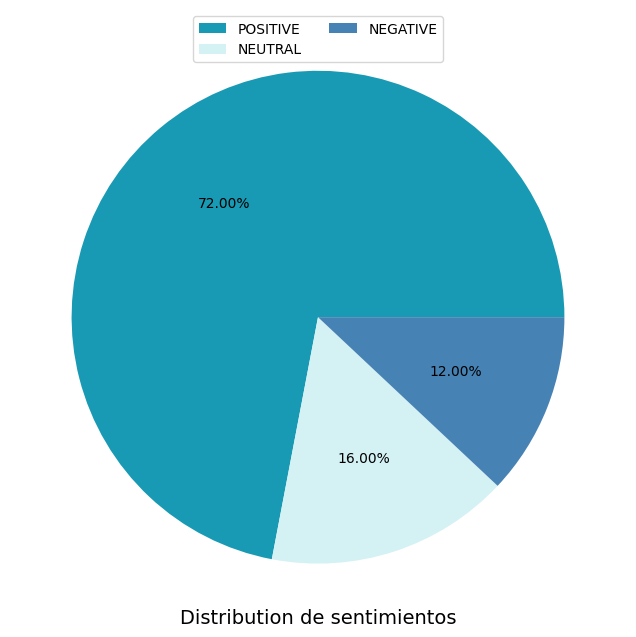

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE',"NEUTRAL",'NEGATIVE']
colors = ['#189AB4', '#D4F1F4','#4682B4']
plt.pie(data2['sentiment2'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution de sentimientos', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

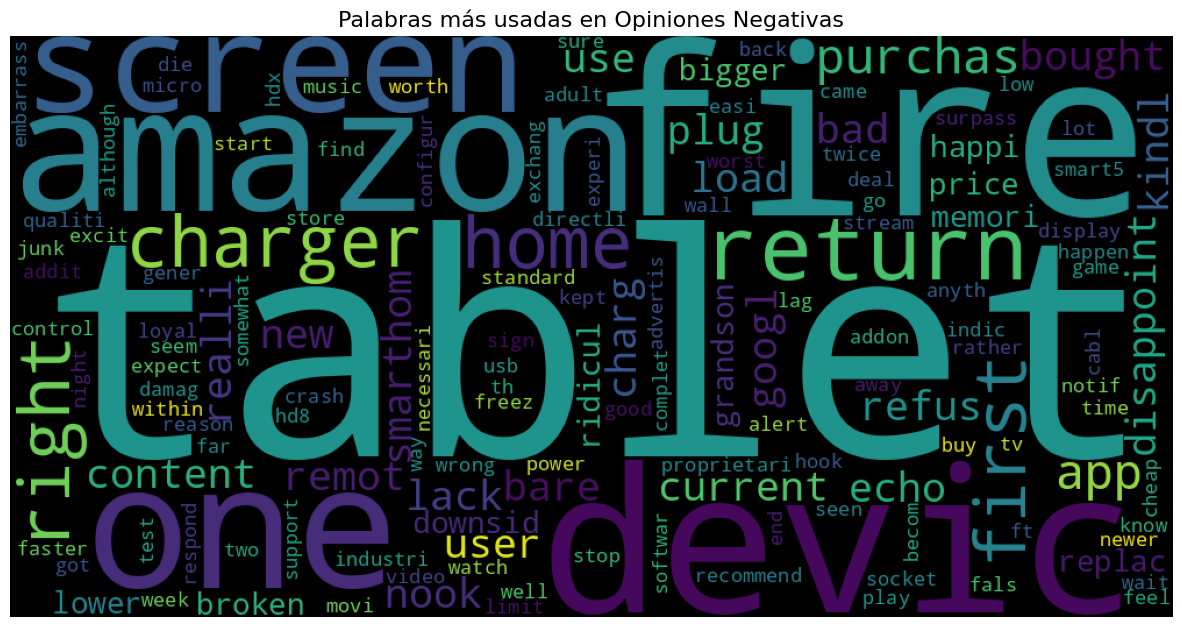

In [ ]:
# get words used positive reivews
negativeWords = pd.Series(' '.join(data2[data2['sentiment2']=='NEGATIVE']["reviews.text.ing"]).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Negativas", size=16)

plt.axis("off")
plt.show()

#### *Conclusion 1*

* Los modelos de bag of words son muy buenos a la hora de identificar textos de polaridades claras pero le cuesta mucho cuando los textos presentan polaridades inconcinas.

* para esto se utilizan modelos mas poderosos como transformers, modelos de aprendizaje supervisado y algunas aplicaciones de aprendizaje no supervisado.